***2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.***

In [2]:
# Data Analysis & Data Wrangling
import numpy as np
import pandas as pd


import scipy.stats as stats


# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filtering warning message
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
## Importing the datatset
df=pd.read_csv("/content/insurance_part2_data.csv")

In [ ]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [89]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Agency_Code   3000 non-null   int8   
 1   Type          3000 non-null   int8   
 2   Claimed       3000 non-null   int8   
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   int8   
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   int8   
 8   Destination   3000 non-null   int8   
dtypes: float64(2), int64(1), int8(6)
memory usage: 88.0 KB


In [ ]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [ ]:
df.shape

(3000, 10)

In [ ]:
# Are there any missing values ?
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [ ]:
df.Type


0            Airlines
1       Travel Agency
2       Travel Agency
3       Travel Agency
4            Airlines
            ...      
2995    Travel Agency
2996         Airlines
2997    Travel Agency
2998         Airlines
2999         Airlines
Name: Type, Length: 3000, dtype: object

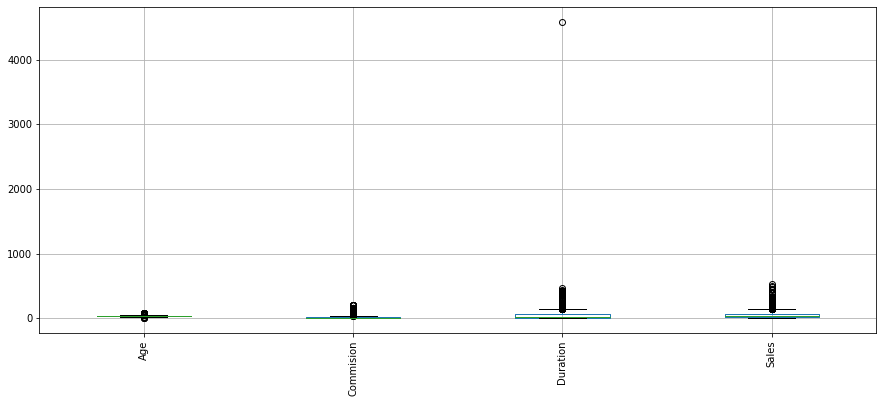

In [ ]:
df.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

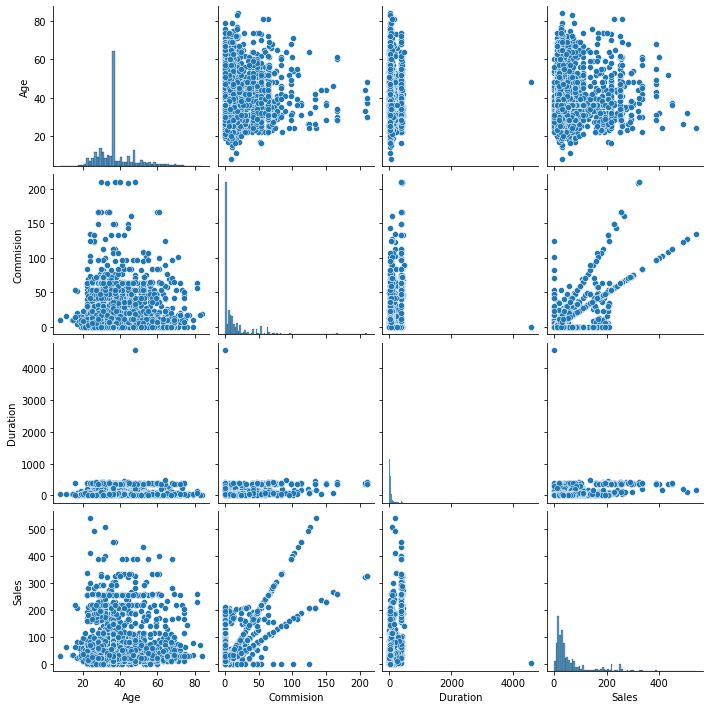

In [ ]:
sns.pairplot(df)
plt.show();

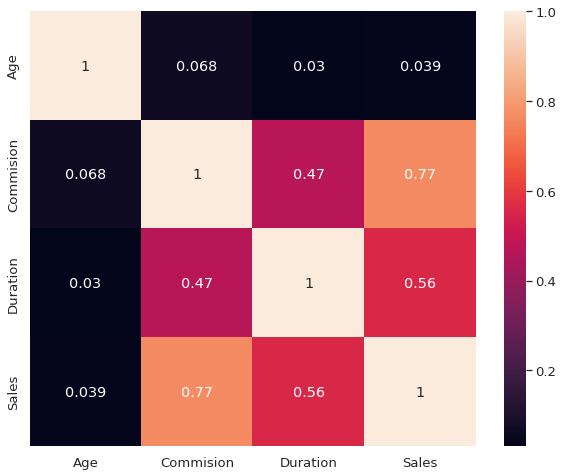

In [ ]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

***2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.***

In [92]:
df.head()

,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,0,0,0,0.70,1,7,2.51,2,0
1,2,1,0,0.00,1,34,20.00,2,0
2,1,1,0,5.94,1,3,9.90,2,1
3,2,1,0,0.00,1,4,26.00,1,0
4,3,0,0,6.30,1,53,18.00,0,0


In [93]:
X = df.drop("Product Name", axis=1)

y = df.pop("Product Name")
X.head()


,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Destination
0,0,0,0,0.70,1,7,2.51,0
1,2,1,0,0.00,1,34,20.00,0
2,1,1,0,5.94,1,3,9.90,1
3,2,1,0,0.00,1,4,26.00,0
4,3,0,0,6.30,1,53,18.00,0


In [94]:
y.head()

0    2
1    2
2    2
3    1
4    0
Name: Product Name, dtype: int8

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [96]:


print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 8)
X_test (900, 8)
train_labels (2100,)
test_labels (900,)


In [97]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10],#[10,20,30,50]#[3,5,7,9]
    'min_samples_leaf': [250],#[100,150,200,250]# 1-3% 50-150
    'min_samples_split': [750]#[150,300,450,600,750] # 150 - 450
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)


In [98]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 250, 'min_samples_split': 750}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [99]:
param_grid = {#put a grid for hyperparameters
    'max_depth': [10],
    'max_features': [5],#[5,4,6],
    'min_samples_leaf': [250],
    'min_samples_split': [750],
    'n_estimators': [100]#150,250
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)



In [100]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'max_features': [5],
                         'min_samples_leaf': [250], 'min_samples_split': [750],
                         'n_estimators': [100]})

In [101]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 250,
 'min_samples_split': 750,
 'n_estimators': 100}

In [102]:
best_grid

DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=750)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [104]:
param_grid = {
    'hidden_layer_sizes': [32],#[32,64,128], #Multiple layers(200,120) 
    'max_iter': [200],
    'solver': ['adam'], #sgd
}

nncl = MLPClassifier(early_stopping = True, tol = 0.01)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [105]:
grid_search.fit(X_train_scaled, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 32, 'max_iter': 200, 'solver': 'adam'}

In [106]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(early_stopping=True, hidden_layer_sizes=32, tol=0.01)

***2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.***

In [113]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [114]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [134]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train)
                               )

ld_Tree_File.close()

In [121]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [121]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

In [121]:
 pd.DataFrame(ytest_predict_prob).head()

In [86]:
import matplotlib.pyplot as plt

In [135]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [136]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
## Labelling 
plt.title(" ROC Curves & AUC")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")
# show the plot
plt.show()

In [86]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
## Labelling 
plt.title(" ROC Curves & AUC")
plt.xlabel(" Specificity")
plt.ylabel("Sensitivity")
# show the plot
plt.show()

In [86]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [81]:
cm_train = confusion_matrix(train_labels, ytrain_predict)

In [86]:
sns.heatmap(data=df,annot =True, cmap ='coolwarm', fmt='', cbar =False).set_title('Confusion Matrix of Training Data');
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [87]:
#Train Data Accuracy
reg_dt_model.score(X_train,train_labels)

In [87]:
print(classification_report(train_labels, ytrain_predict))

In [87]:
#Accuracy on the Training Data: 83%
Accuracy on the Test Data: 82%

AUC on the Training Data: 87.9%
AUC on the Test: 88.1%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

FICO, term and gender (in same order of preference) are the most important variables in determining if a borrower will get into a delinquent stage

***2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.***

In [1]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [128]:
confusion_matrix(train_labels,ytrain_predict)

array([[  0,   6,   4, 420,   9],
       [  0, 452,  17,   0,   1],
       [  0, 456,  38, 289,  19],
       [  0,   0,   0,  82,   0],
       [  0,   3,   1, 300,   3]])

In [129]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.27380952380952384

In [131]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       439
           1       0.49      0.96      0.65       470
           2       0.63      0.05      0.09       802
           3       0.08      1.00      0.14        82
           4       0.09      0.01      0.02       307

    accuracy                           0.27      2100
   macro avg       0.26      0.40      0.18      2100
weighted avg       0.37      0.27      0.19      2100



In [137]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.49
nn_train_recall  0.96
nn_train_f1  0.65


In [145]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

In [139]:
#for test

In [140]:
confusion_matrix(test_labels,ytest_predict)

array([[  0,   5,   3, 200,   3],
       [  0, 200,   7,   0,   1],
       [  0, 216,  12, 101,   5],
       [  0,   0,   0,  27,   0],
       [  0,   0,   0, 119,   1]])

In [141]:
nn_test_acc=best_grid.score(X_test_scaled,test_labels)
nn_test_acc

0.6744444444444444

In [1]:
print(classification_report(train_labels, ytrain_predict))

In [143]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.48
nn_test_recall  0.96
nn_test_f1  0.64


In [145]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [145]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(early_stopping=True, hidden_layer_sizes=32, tol=0.01)>

***2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.***